In [24]:
# !pip install keras-tuner --upgrade

import keras_tuner
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, TimeDistributed, Activation, Bidirectional


In [2]:
# Read data from CSV file (assuming 'word' and 'lemma' columns)
df = pd.read_csv('urdu_completewords.csv')

word_to_lemma = list(zip(df['Word'], df['Lemma']))

print(word_to_lemma)

train_set, test_set = train_test_split(word_to_lemma,
                                       test_size=0.2,
                                       random_state=42)
print(len(train_set), len(test_set))


[('جميعت', ' جمع '), ('تحقيق', ' حق'), ('خلافت', ' خليفہ'), ('دقائق', ' دقيقہ'), ('مسجود', ' سجدہ'), ('سلاست', ' سليس'), ('شفاعت', ' شافع'), ('شرائف', ' شریف'), ('شفاعت', ' شفيع'), (' شيرینی', ' شيریں'), ('ضمائر', ' ضمير'), ('طبيعت', ' طبع'), ('عقوبت', ' عقاب '), (' فضيلت', ' فضل'), ('کدورت', ' کدر '), ('کرائب', ' کریب'), (' گرانی ', ' گراں '), (' ملفوف', ' لفافہ'), ('لواطت', ' لوطی'), ('نحوست', ' نحس'), (' وجاہت', ' وجيہہ'), ('ابابيلیں', 'ابابيل'), ('ابابيلوں', 'ابابيل'), ('ابابيلو', 'ابابيل'), ('اباسیاں', 'اباسی'), ('اباسیوں', 'اباسی'), ('اباسیو', 'اباسی'), ('اباق', 'اباق'), ('اباکے', 'اباک'), ('اباکیں', 'اباک'), ('اباکا', 'اباک'), ('اباکوں', 'اباک'), ('اباکو', 'اباک'), ('اباکی', 'اباک'), ('اباکی', 'اباک'), ('ابالیں', 'ابال'), ('ابالا', 'ابال'), ('ابالوں', 'ابال'), ('ابالو', 'ابال'), ('ابالی', 'ابال'), ('ابالی', 'ابال'), ('اباليسوں', 'اباليس'), ('اباليسو', 'اباليس'), ('ابالے', 'ابالے'), ('ابتدائیں', 'ابتدا'), ('ابتداؤں', 'ابتدا'), ('ابتداؤ', 'ابتدا'), ('ابتدائی', 'ابتدا'), ('ابتدائیہ

In [3]:
words = [n for (n, l) in train_set] ## X
lemmas = [l for (n, l) in train_set] ## y

In [4]:
print(words)

['آفریدگار', 'نکالیو', 'انگڑائیں', 'پاٹے', 'گھرتی', 'ہرتے', 'آسانگیوں', 'ٹونگنے', 'ٹفن', 'گهٹائیں', 'چیپوں', 'چھلکاتے', 'پهوٹیوں', 'اٹکلی', 'لکا', 'لٹکیو', 'فازہروں', 'طفيلوں', 'گروائے', 'نفرتو', 'تجیں', 'بوکھلائیں', 'ہچکئیے', 'ہڑونگا', 'شخلے', 'ساتهی', 'برکیاؤ', 'ٹھکواؤں', 'دهپڑا', 'شراکت', 'عارضوں', 'سروکاریں', 'کهٹلو', 'لپٹائیو', 'فانی', 'دلاسا', 'پھینکوانی', 'ہنسنے', 'اڑھانا', 'ٹکورتا', 'فرضوں', 'اضافيت', 'فساخین', 'مجتہدت', 'قادمو', 'خانقاہو', 'چوم', 'تپانا', 'ترنا', 'ہروائیے', 'مکهیو', 'کلواری', 'اپاڑ', 'جهڑپتی', 'لچکا', 'علاجو', 'سيری', 'لتاڑنی', 'گرجئیے', 'اگو', 'مارتیں', 'بھیگے', 'خرچے', 'پيڑهیاں', 'نباہی', 'بهونچمپا', 'پلپلاہٹوں', 'اسلوبو', 'پهرپهرا', 'پروانگیو', 'رمجھماتا', 'محتاجوں', 'ترشاتی', 'رنگا', 'تچائے', 'ٹھیلیں', 'حرکیوں', 'کھڑکایا', 'پکڑتی', 'چراغاں', 'پچھا', 'نگلانا', 'پجرنی', 'کهجائیو', 'لپيٹنی', 'کودکستان', 'جوہری', 'بداؤ', 'ٹھٹکوں', 'بربرانی', 'کهسکی', 'چهنکواتیں', 'مکالمات', 'دستکانہ', 'کٹے', 'ملتمسوں', 'لرنٹو', 'پاليٹکس', 'لگاؤ', 'جهلوائی', 'کلپا', 'تھپئیے', '

In [5]:
print(lemmas)

['آفریدگار', 'نکال', 'انگڑا', 'پاٹ', 'گھر', 'ہر', 'آسانگی', 'ٹونگ', 'ٹفن', 'گهٹا', 'چیپ', 'چھلکا', 'پهوٹی', 'اٹکل', 'لک', 'لٹک', 'فازہر', 'طفيل', 'گروا', 'نفرت', 'تج', 'بوکھلا', 'ہچک', 'ہڑونگ', 'شخل', 'ساته', 'برکیا', 'ٹھکوا', 'دهپڑا', 'شرک', 'عارض', 'سروکار', 'کهٹل', 'لپٹا', 'فان', 'دلاس', 'پھینکوا', 'ہنس', 'اڑھا', 'ٹکور', 'فرض', 'اضافيت', 'فساخ', 'مجتہدت', 'قادم', 'خانقاہ', 'چوم', 'تپا', 'تر', 'ہروا', 'مکهی', 'کلوار', 'اپاڑ', 'جهڑپ', 'لچک', 'علاج', 'سيری', 'لتاڑ', 'گرج', 'اگ', 'مار', 'بھیگ', 'خرچ', 'پيڑهی', 'نباہ', 'بهونچمپا', 'پلپلاہٹ', 'اسلوب', 'پهرپهرا', 'پروانگی', 'رمجھما', 'محتاج', 'ترشا', 'رنگ', 'تچا', 'ٹھیل', 'حرک', 'کھڑکا', 'پکڑ', 'چراغاں', 'پچھ', 'نگلا', 'پجر', 'کهجا', 'لپيٹ', 'کودک', 'جوہر', 'بدا', 'ٹھٹک', 'بربرا', 'کهسک', 'چهنکوا', 'مکالمہ', 'دستکانہ', 'کٹ', 'ملتمس', 'لرنٹ', 'پاليٹکس', 'لگا', 'جهلوا', 'کلپ', 'تھپ', 'حریر', 'اڑھا', 'دھونس', 'برتا', 'تکل', 'پادی', 'دهنس', 'خاتون', 'جگ', 'چڑ', 'جہاز', 'پٹهار', 'پهرت', 'فرنگيت', 'فلمستان', 'ٹهير', 'دمکا', 'باندھ', 'تڑپ', 'ماپ'

In [6]:
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(words) 

In [7]:
# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 53


In [8]:
tokenizer.word_index

{'ا': 1,
 'و': 2,
 'ی': 3,
 'ن': 4,
 'ت': 5,
 'ر': 6,
 'ں': 7,
 'ک': 8,
 'ل': 9,
 'م': 10,
 'ھ': 11,
 'پ': 12,
 'ے': 13,
 'ب': 14,
 'ٹ': 15,
 'س': 16,
 'ه': 17,
 'د': 18,
 'ئ': 19,
 'چ': 20,
 'گ': 21,
 'ج': 22,
 'ي': 23,
 'ہ': 24,
 'ڑ': 25,
 'ش': 26,
 'ف': 27,
 'ق': 28,
 'ڈ': 29,
 'ؤ': 30,
 'خ': 31,
 'ع': 32,
 'ح': 33,
 'ز': 34,
 'ص': 35,
 'ط': 36,
 'غ': 37,
 'ض': 38,
 'ث': 39,
 'آ': 40,
 'ذ': 41,
 'ظ': 42,
 ' ': 43,
 'ً': 44,
 'ء': 45,
 'ژ': 46,
 'ۓ': 47,
 '،': 48,
 'ۃ': 49,
 'ٔ': 50,
 'ّ': 51,
 'ـ': 52}

In [9]:
tokenizer.fit_on_texts(lemmas)
words_ints = tokenizer.texts_to_sequences(words)
lemmas_ints = tokenizer.texts_to_sequences(lemmas)


In [10]:
print(words[:5])
print(words_ints[:5])
print(lemmas[:5])
print(lemmas_ints[:5])

['آفریدگار', 'نکالیو', 'انگڑائیں', 'پاٹے', 'گھرتی']
[[40, 27, 5, 3, 17, 19, 1, 5], [4, 7, 1, 8, 3, 2], [1, 4, 19, 23, 1, 25, 3, 16], [11, 1, 13, 24], [19, 10, 5, 6, 3]]
['آفریدگار', 'نکال', 'انگڑا', 'پاٹ', 'گھر']
[[40, 27, 5, 3, 17, 19, 1, 5], [4, 7, 1, 8], [1, 4, 19, 23, 1], [11, 1, 13], [19, 10, 5]]


انسائيکلوپيڈیائی


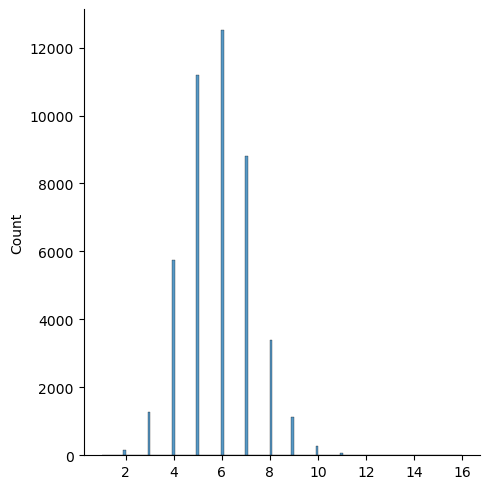

In [11]:
import seaborn as sns
import numpy as np

## We can check the length distribution of texts in corpus

words_lens = [len(n) for n in words_ints]
words_lens

sns.displot(words_lens)
print(words[np.argmax(words_lens)])  # longest name

In [12]:
max_len = words_lens[np.argmax(words_lens)]
max_len

16

In [13]:
words_ints_pad = sequence.pad_sequences(words_ints, maxlen=max_len,padding='post')
words_ints_pad[:10]

array([[40, 27,  5,  3, 17, 19,  1,  5,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  7,  1,  8,  3,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  4, 19, 23,  1, 25,  3, 16,  0,  0,  0,  0,  0,  0,  0,  0],
       [11,  1, 13, 24,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [19, 10,  5,  6,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [22,  5,  6, 24,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [40, 14,  1,  4, 19,  3,  2, 16,  0,  0,  0,  0,  0,  0,  0,  0],
       [13,  2,  4, 19,  4, 24,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [13, 27,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [19, 15, 13,  1, 25,  3, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [14]:
lemmas_ints_pad = sequence.pad_sequences(lemmas_ints, maxlen=max_len,padding='post')
lemmas_ints_pad[:10]

array([[40, 27,  5,  3, 17, 19,  1,  5,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  7,  1,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  4, 19, 23,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [11,  1, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [19, 10,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [22,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [40, 14,  1,  4, 19,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [13,  2,  4, 19,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [13, 27,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [19, 15, 13,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [15]:
## training data
X_train = np.array(words_ints_pad).astype('int32')
y_train = np.array(lemmas_ints_pad).astype('int32')


## testing data
X_test_texts = [n for (n, l) in test_set]
Y_test_texts = [l for (n, l) in test_set]
X_test = np.array(
    sequence.pad_sequences(tokenizer.texts_to_sequences(X_test_texts),
                           maxlen=max_len)).astype('int32')
y_test = np.array(
    sequence.pad_sequences(tokenizer.texts_to_sequences(Y_test_texts),
                           maxlen=max_len)).astype('int32')

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(44557, 16)
(44557, 16)
(11140, 16)
(11140, 16)


In [17]:
words_matrix = tokenizer.texts_to_matrix(words, mode="binary")
print(words_matrix.shape)

(44557, 56)


In [18]:
lemmas_matrix = tokenizer.texts_to_matrix(lemmas, mode="binary")
print(lemmas_matrix.shape)

(44557, 56)


In [19]:
print(X_test)

[[ 0  0  0 ...  1  4  3]
 [ 0  0  0 ...  2 13  2]
 [ 0  0  0 ...  2  5 20]
 ...
 [ 0  0  0 ...  6  3 16]
 [ 0  0  0 ...  6  3 16]
 [ 0  0  0 ...  3 17  3]]


In [20]:
print(test_set)

[('گرانی', 'گرا'), ('کهيوٹو', 'کهيوٹ'), ('سورج', 'سورج'), ('بہلائے', 'بہلا'), ('جہانیاں', 'جہان'), ('کھلو', 'کھل'), ('ملعونو', 'ملعون'), ('ٹماٹرو', 'ٹماٹر'), ('سونگھایا', 'سونگھا'), ('اسباغ', 'سبغ'), ('خانسامنوں', 'خانسامن'), ('لچکاتیں', 'لچکا'), ('جمائی', 'جما'), ('سروانگو', 'سروانگ'), ('مامنو', 'مامن'), ('چٹکے', 'چٹک'), ('ٹانکنی', 'ٹانک'), ('منگنیو', 'منگنی'), ('کتابہ', 'کتاب'), ('مارگو', 'مارگ'), ('جفائیں', 'جفا'), ('بيٹا', 'بيٹا'), ('پلاسوں', 'پلاس'), ('دهاڑتے', 'دهاڑ'), ('مزے', 'مزہ'), ('اساعتیں', 'اساعت'), ('قائدہ', 'قائد'), ('ڈلکے', 'ڈلک'), ('تهيلا', 'تهيلا'), ('کثافتیں', 'کثافت'), ('بجهائیں', 'بجها'), ('الفتی', 'الفت'), ('تشریح', 'شرح'), ('کهدری', 'کهدر'), ('کھنکھنائیے', 'کھنکھنا'), ('پهيرائیوں', 'پهيرائی'), ('تشویشو', 'تشویش'), ('اٹکاؤ', 'اٹکا'), ('پھولا', 'پھول'), ('نثارا', 'نثار'), ('دیمک', 'دیمک'), ('للکارو', 'للکار'), ('تگنی', 'تگ'), ('بھنی', 'بھن'), ('پرتهویوں', 'پرتهوی'), ('گهنگهنا', 'گهنگهنا'), ('چپچپایا', 'چپچپا'), ('جیتا', 'جی'), ('تھتکارتا', 'تھتکار'), ('مکتب', 'کتب'

In [21]:
print(words[2])
print(words_matrix[2,:])

انگڑائیں
[0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [22]:
print(lemmas[2])
print(lemmas_matrix[2,:])

انگڑا
[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [25]:
# Define the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len))
model.add(Bidirectional(LSTM(units=64, return_sequences=True)))  # BiLSTM layer
model.add(TimeDistributed(Dense(56, activation='softmax')))  # TimeDistributed for sequence prediction


# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
349/349 [==============================] - 55s 138ms/step - loss: 1.0144 - accuracy: 0.7905
Epoch 2/10
349/349 [==============================] - 45s 129ms/step - loss: 0.1576 - accuracy: 0.9692
Epoch 3/10
349/349 [==============================] - 43s 123ms/step - loss: 0.0704 - accuracy: 0.9841
Epoch 4/10
349/349 [==============================] - 45s 130ms/step - loss: 0.0593 - accuracy: 0.9856
Epoch 5/10
349/349 [==============================] - 49s 140ms/step - loss: 0.0538 - accuracy: 0.9864
Epoch 6/10
349/349 [==============================] - 48s 138ms/step - loss: 0.0502 - accuracy: 0.9870
Epoch 7/10
349/349 [==============================] - 49s 140ms/step - loss: 0.0472 - accuracy: 0.9874
Epoch 8/10
349/349 [==============================] - 50s 142ms/step - loss: 0.0446 - accuracy: 0.9877
Epoch 9/10
349/349 [==============================] - 51s 145ms/step - loss: 0.0422 - accuracy: 0.9880
Epoch 10/10
349/349 [==============================] - 48s 137ms/step - l

In [26]:
from keras.models import load_model

# Assuming 'model' is your trained model
# Save the model to a file
model.save('model.h5')

# Print a success message
print("Model saved successfully as 'model.h5'")

Model saved successfully as 'model.h5'


C:\Users\PMLS\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
def predict_lemma(word, tokenizer, max_len):
    # Convert the word to a sequence of integers
    sequence = tokenizer.texts_to_sequences([word])
    
    # Pad the sequence to the maximum length
    padded_sequence = pad_sequences(sequence, maxlen=max_len,padding='post')
    
    # Load the model weights (if not already loaded)
    model.load_weights('model.h5')  
    
    # Predict the lemma using the trained model
    prediction = model.predict(padded_sequence)
    
    # Convert the prediction to the corresponding lemma
    # Since the output is a sequence, we need to take the argmax for each timestep
    lemma_sequence = np.argmax(prediction, axis=-1)[0]
    
    # Retrieve the corresponding lemma from the tokenizer's index_word dictionary
    lemma = ''.join([tokenizer.index_word.get(i, '') for i in lemma_sequence if i != 0])
    
    return lemma


In [ ]:
test_words = [n for (n, l) in test_set]

In [ ]:
print(test_words)

In [28]:
# Example usage:
# Example usage (Actual lemma = جھجک):
predicted_lemma = predict_lemma('جھجکوں', tokenizer, max_len)
print(f"The predicted lemma for 'جھجکوں' is: {predicted_lemma}")


1/1 [==============================] - 2s 2s/step
The predicted lemma for 'جھجکوں' is: جھجک


In [29]:
# Example usage (Actual lemma = پهنسوا):
predicted_lemma = predict_lemma('پهنسوائیو', tokenizer, max_len)
print(f"The predicted lemma for 'پهنسوائیو' is: {predicted_lemma}")

1/1 [==============================] - 0s 92ms/step
The predicted lemma for 'پهنسوائیو' is: پهنسوای


In [30]:
# Example usage (Actual lemma = خانسامن):
predicted_lemma = predict_lemma('خانسامنوں', tokenizer, max_len)
print(f"The predicted lemma for 'خانسامنوں' is: {predicted_lemma}")

1/1 [==============================] - 0s 39ms/step
The predicted lemma for 'خانسامنوں' is: خانسامن


In [31]:
# Example usage (Actual lemma = جمع):
predicted_lemma = predict_lemma('جميعت', tokenizer, max_len)
print(f"The predicted lemma for 'جميعت' is: {predicted_lemma}")

1/1 [==============================] - 0s 46ms/step
The predicted lemma for 'جميعت' is: جميعت


In [32]:
# Example usage (Actual lemma = ورغلا):
predicted_lemma = predict_lemma('ورغلائیے', tokenizer, max_len)
print(f"The predicted lemma for 'ورغلائیے' is: {predicted_lemma}")

1/1 [==============================] - 0s 65ms/step
The predicted lemma for 'ورغلائیے' is: ورغلا


In [33]:
# Example usage (Actual lemma = ہنڈا):
predicted_lemma = predict_lemma('ہنڈائیے', tokenizer, max_len)
print(f"The predicted lemma for 'ہنڈائیے' is: {predicted_lemma}")

1/1 [==============================] - 0s 62ms/step
The predicted lemma for 'ہنڈائیے' is: ہنڈا


In [34]:
# Example usage (Actual lemma = ہو):
predicted_lemma = predict_lemma('ہونا', tokenizer, max_len)
print(f"The predicted lemma for 'ہونا' is: {predicted_lemma}")

1/1 [==============================] - 0s 43ms/step
The predicted lemma for 'ہونا' is: ہو


In [35]:
# Example usage (Actual lemma = ورغلا):
predicted_lemma = predict_lemma('ورغلاؤں', tokenizer, max_len)
print(f"The predicted lemma for 'ورغلاؤں' is: {predicted_lemma}")


1/1 [==============================] - 0s 52ms/step
The predicted lemma for 'ورغلاؤں' is: ورغلا


In [36]:
# Example usage (Actual lemma = ہنہنا):
predicted_lemma = predict_lemma('ہنہنائیے', tokenizer, max_len)
print(f"The predicted lemma for 'ہنہنائیے' is: {predicted_lemma}")


1/1 [==============================] - 0s 54ms/step
The predicted lemma for 'ہنہنائیے' is: ہنہنا


In [37]:
# Example usage (Actual lemma = ہلا):
predicted_lemma = predict_lemma('ہلائیو', tokenizer, max_len)
print(f"The predicted lemma for 'ہلائیو' is: {predicted_lemma}")

1/1 [==============================] - 0s 40ms/step
The predicted lemma for 'ہلائیو' is: ہلا


In [38]:
# Example usage (Actual lemma = ہڑکا):
predicted_lemma = predict_lemma('ہڑکاتیں', tokenizer, max_len)
print(f"The predicted lemma for 'ہڑکاتیں' is: {predicted_lemma}")

1/1 [==============================] - 0s 47ms/step
The predicted lemma for 'ہڑکاتیں' is: ہڑکا


In [39]:
# Example usage (Actual lemma = نورا):
predicted_lemma = predict_lemma('نوراؤ', tokenizer, max_len)
print(f"The predicted lemma for 'نوراؤ' is: {predicted_lemma}")

1/1 [==============================] - 0s 46ms/step
The predicted lemma for 'نوراؤ' is: نورا


In [40]:
# Example usage (Actual lemma = نہڑا):
predicted_lemma = predict_lemma('نہڑایا', tokenizer, max_len)
print(f"The predicted lemma for 'نہڑایا' is: {predicted_lemma}")

1/1 [==============================] - 0s 53ms/step
The predicted lemma for 'نہڑایا' is: نہڑا


In [41]:
# Example usage (Actual lemma = سکهلا):
predicted_lemma = predict_lemma('سکهلانا', tokenizer, max_len)
print(f"The predicted lemma for 'سکهلانا' is: {predicted_lemma}")

1/1 [==============================] - 0s 45ms/step
The predicted lemma for 'سکهلانا' is: سکهلا


In [49]:
# Example usage (Actual lemma = اٹ):
word = 'اٹتیں'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 57ms/step
The predicted lemma for اٹتیں is: اٹ


In [ ]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

In [50]:
# df = pd.read_csv('urdu_completewords.csv')
# train_set, test_set = train_test_split(word_to_lemma,
#                                        test_size=0.2,
#                                        random_state=42)

# word_to_lemma = list(zip(df['Word'], df['Lemma']))
# words = [n for (n, l) in train_set] ## X
# lemmas = [l for (n, l) in train_set] ## y
# tokenizer = Tokenizer(char_level=True)
# tokenizer.fit_on_texts(words)
# vocab_size = len(tokenizer.word_index) + 1
# print('Vocabulary Size: %d' % vocab_size)
# tokenizer.fit_on_texts(lemmas)
# words_ints = tokenizer.texts_to_sequences(words)
# lemmas_ints = tokenizer.texts_to_sequences(lemmas)
# max_len = words_lens[np.argmax(words_lens)]
# words_ints_pad = sequence.pad_sequences(words_ints, maxlen=max_len)
# lemmas_ints_pad = sequence.pad_sequences(lemmas_ints, maxlen=max_len)
# ## training data
# X_train = np.array(words_ints_pad).astype('int32')
# y_train = np.array(lemmas_ints_pad).astype('int32')


# ## testing data
# X_test_texts = [n for (n, l) in test_set]
# Y_test_texts = [l for (n, l) in test_set]
# X_test = np.array(
#     sequence.pad_sequences(tokenizer.texts_to_sequences(X_test_texts),
#                            maxlen=max_len)).astype('int32')
# y_test = np.array(
#     sequence.pad_sequences(tokenizer.texts_to_sequences(Y_test_texts),
#                            maxlen=max_len)).astype('int32')
# words_matrix = tokenizer.texts_to_matrix(words, mode="binary")
# lemmas_matrix = tokenizer.texts_to_matrix(lemmas, mode="binary")
# Define the model
# model = Sequential()
# model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len))
# model.add(Bidirectional(LSTM(units=64, return_sequences=True)))  # BiLSTM layer
# model.add(TimeDistributed(Dense(56, activation='softmax')))  # TimeDistributed for sequence prediction

# # Compile the model
# model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=128)